# Feature selection

In [ ]:
# the objective is to determine the parameters which influence more on our prediction model here our model
# allows you to predict the price of housing in California

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")
sns.set(rc={'figure.figsize':(12,4)})

In [ ]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = data.data
y = data.target
feature_names = np.array(data.feature_names)

# shuffle data
indexes = np.arange(len(y))
np.random.seed(42)
np.random.shuffle(indexes)

X = X[indexes, :]
y = y[indexes]

## Filter methods: scoring by correlation

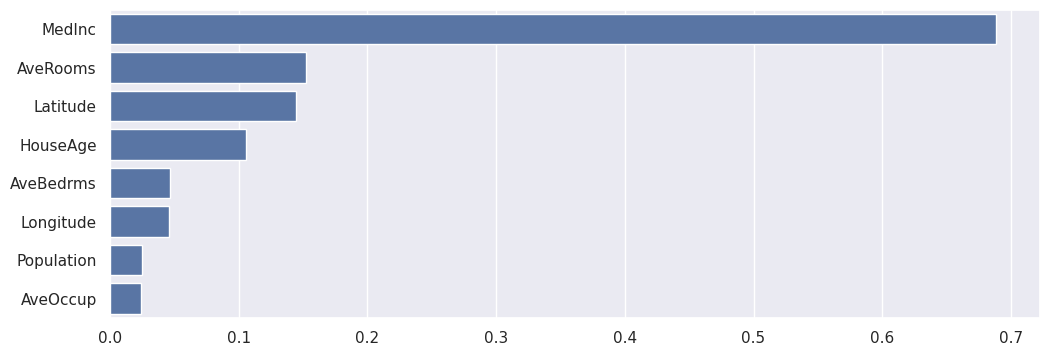

In [ ]:
from scipy.stats import pearsonr

n_features = X.shape[1]
features_ind = np.arange(n_features)
corr_vec = np.abs([pearsonr(X[:, i], y)[0] for i in features_ind])

features_scores = corr_vec
features_ind_importances = np.argsort(features_scores)[::-1]

sns.barplot(x=features_scores[features_ind_importances], y=feature_names[features_ind_importances], color='b');

In [ ]:
from sklearn.model_selection import cross_val_score

def get_scores_filtering_feature_selection(X, y, features_ind_importances, estimator, scoring, cv):
    scores = []
    n_features = len(features_ind_importances)
    n_features_deleted = range(n_features)

    for n in reversed(n_features_deleted):
      X_reduced = X[:, features_ind_importances[:n+1]]
      scores.append(cross_val_score(estimator, X_reduced, y, scoring=scoring, cv=cv).mean())
    return n_features_deleted, scores

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

SCORING_REG = 'r2'
CV = 3
PARAMS_LR = {}
PARAMS_RF = {'n_estimators': 100, 'max_depth': 3, 'n_jobs': -1}

lr = LinearRegression(**PARAMS_LR)
n_features_deleted, scores_lr = get_scores_filtering_feature_selection(X, y, features_ind_importances, lr, scoring=SCORING_REG, cv=CV)
rf = RandomForestRegressor(**PARAMS_RF)
n_features_deleted, scores_rf = get_scores_filtering_feature_selection(X, y, features_ind_importances, rf, scoring=SCORING_REG, cv=CV)

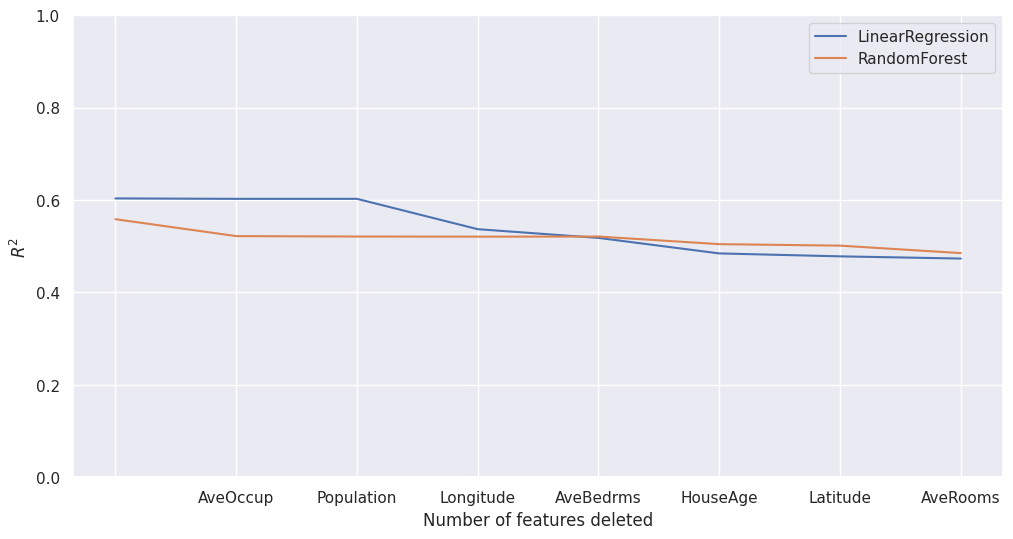

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(n_features_deleted, scores_lr, label='LinearRegression')
plt.plot(n_features_deleted, scores_rf, label='RandomForest')
plt.legend(loc='best')
plt.xlabel('Number of features deleted')
plt.ylabel('$R^2$')
plt.ylim(0, 1)

xtickslabels = [''] + list(feature_names[features_ind_importances][::-1][:-1])
plt.xticks(ticks=n_features_deleted, labels=xtickslabels)

plt.show()


## Filter methods: scoring by mutual info regression

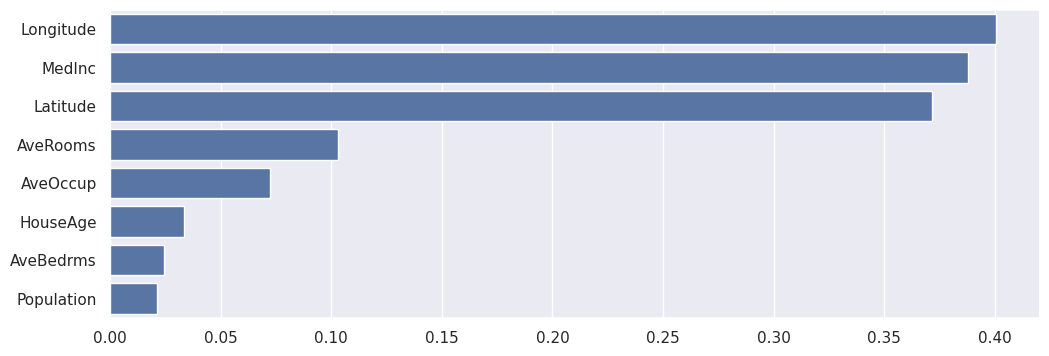

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

select_mutual_info = SelectKBest(score_func=mutual_info_regression, k='all')
z = select_mutual_info.fit_transform(X, y)

features_scores = select_mutual_info.scores_
features_ind_importances = np.argsort(features_scores)[::-1]

sns.barplot(x=features_scores[features_ind_importances], y=feature_names[features_ind_importances], color='b');

In [ ]:
lr = LinearRegression(**PARAMS_LR)
n_features_deleted, scores_lr = get_scores_filtering_feature_selection(X, y, features_ind_importances, lr, scoring=SCORING_REG, cv=CV)
rf = RandomForestRegressor(**PARAMS_RF)
n_features_deleted, scores_rf = get_scores_filtering_feature_selection(X, y, features_ind_importances, rf, scoring=SCORING_REG, cv=CV)

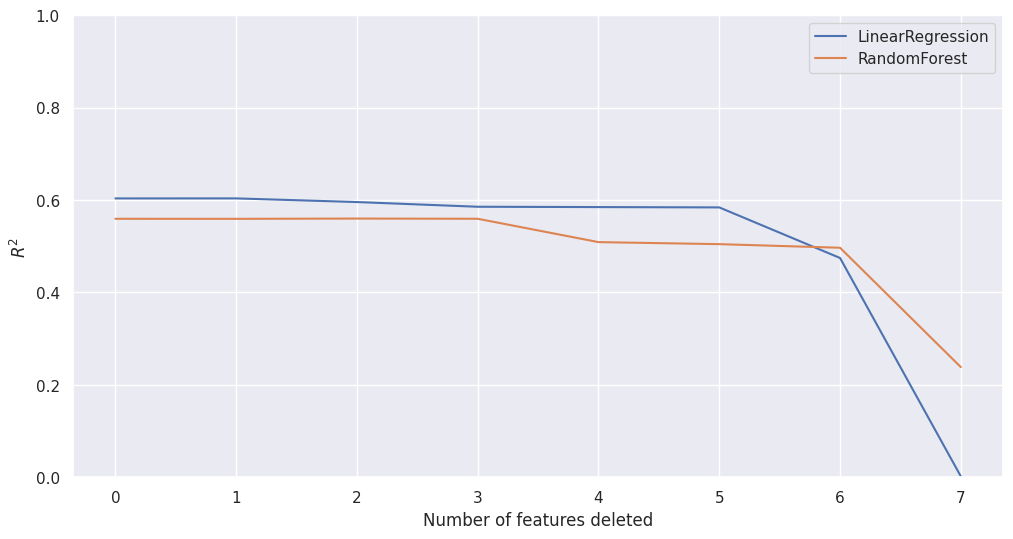

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(n_features_deleted, scores_lr, label='LinearRegression')
plt.plot(n_features_deleted, scores_rf, label='RandomForest')
plt.legend(loc='best')
plt.xlabel('Number of features deleted')
plt.ylabel('$R^2$')
plt.ylim(0, 1)
plt.show()

## Wrapper methods: recursive feature elimination

In [ ]:
from sklearn.feature_selection import RFE

def get_scores_RFE(X, y, estimator, scoring, cv):
    scores = []
    n_features = X.shape[1]
    n_features_deleted = range(n_features)

    for n in reversed(n_features_deleted):
      selector = RFE(LinearRegression(), n_features_to_select=n+1, step=1)
      selector = selector.fit(X, y)
      X_reduced = selector.transform(X)
      scores.append(cross_val_score(estimator, X_reduced, y, scoring=scoring, cv=cv).mean())
    return n_features_deleted, scores

In [ ]:
lr = LinearRegression(**PARAMS_LR)
n_features_deleted, scores_lr = get_scores_RFE(X, y, lr, scoring=SCORING_REG, cv=CV)
rf = RandomForestRegressor(**PARAMS_RF)
n_features_deleted, scores_rf = get_scores_RFE(X, y, rf, scoring=SCORING_REG, cv=CV)

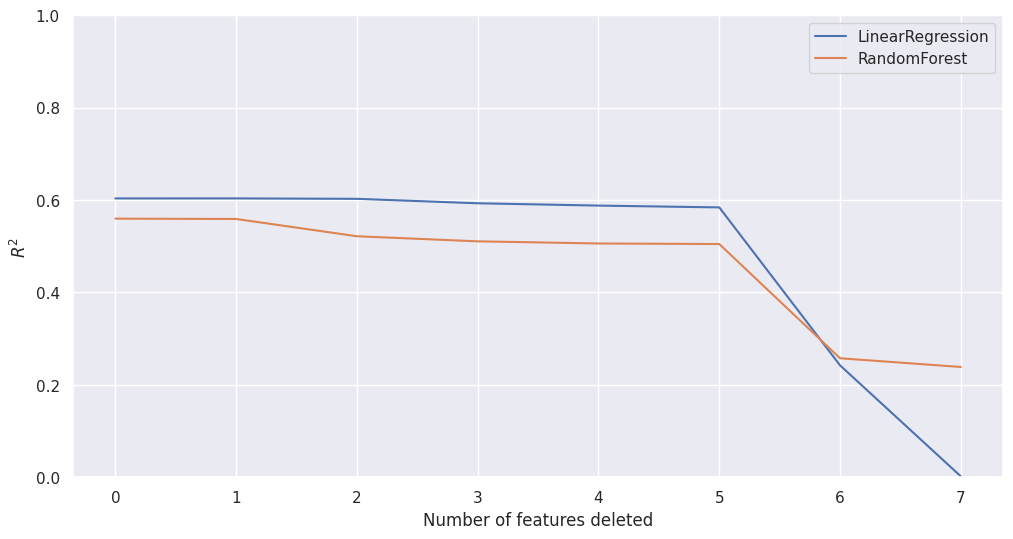

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(n_features_deleted, scores_lr, label='LinearRegression')
plt.plot(n_features_deleted, scores_rf, label='RandomForest')
plt.legend(loc='best')
plt.xlabel('Number of features deleted')
plt.ylabel('$R^2$')
plt.ylim(0, 1)
plt.show()

## Embedding methods

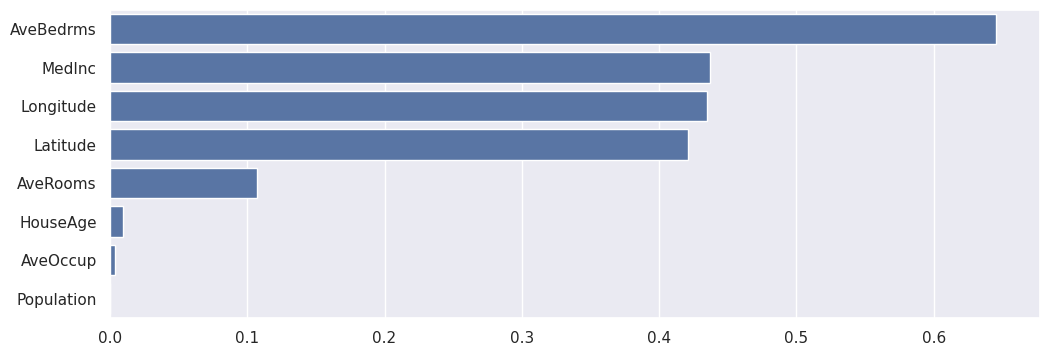

In [ ]:
from sklearn.feature_selection import SelectFromModel

estimator = LinearRegression()
selector = SelectFromModel(estimator)
selector = selector.fit(X, y)

features_scores = abs(selector.estimator_.coef_)
features_ind_importances = np.argsort(features_scores)[::-1]

sns.barplot(x=features_scores[features_ind_importances], y=feature_names[features_ind_importances], color='b');

In [ ]:
lr = LinearRegression(**PARAMS_LR)
n_features_deleted, scores_lr = get_scores_filtering_feature_selection(X, y, features_ind_importances, lr, scoring=SCORING_REG, cv=CV)
rf = RandomForestRegressor(**PARAMS_RF)
n_features_deleted, scores_rf = get_scores_filtering_feature_selection(X, y, features_ind_importances, rf, scoring=SCORING_REG, cv=CV)

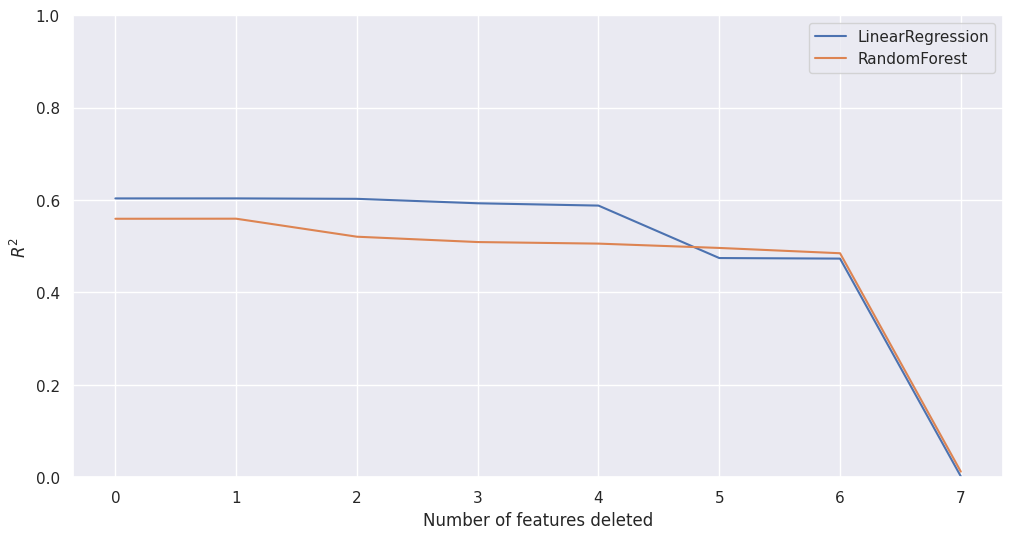

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(n_features_deleted, scores_lr, label='LinearRegression')
plt.plot(n_features_deleted, scores_rf, label='RandomForest')
plt.legend(loc='best')
plt.xlabel('Number of features deleted')
plt.ylabel('$R^2$')
plt.ylim(0, 1)
plt.show()

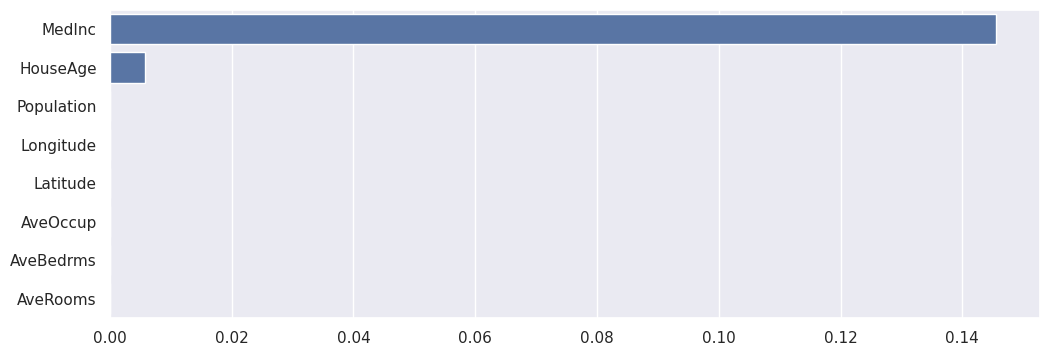

In [ ]:
from sklearn.linear_model import Lasso

estimator = Lasso()
selector = SelectFromModel(estimator)
selector = selector.fit(X, y)

features_scores = abs(selector.estimator_.coef_)
# features_scores = features_scores[abs(features_scores) > 1e-5]
features_ind_importances = np.argsort(features_scores)[::-1]

sns.barplot(x=features_scores[features_ind_importances], y=feature_names[features_ind_importances], color='b');

In [ ]:
features_scores = features_scores[abs(features_scores) > 1e-5]
features_ind_importances = np.argsort(features_scores)[::-1]

In [ ]:
lr = LinearRegression(**PARAMS_LR)
n_features_deleted, scores_lr = get_scores_filtering_feature_selection(X, y, features_ind_importances, lr, scoring=SCORING_REG, cv=CV)
rf = RandomForestRegressor(**PARAMS_RF)
n_features_deleted, scores_rf = get_scores_filtering_feature_selection(X, y, features_ind_importances, rf, scoring=SCORING_REG, cv=CV)

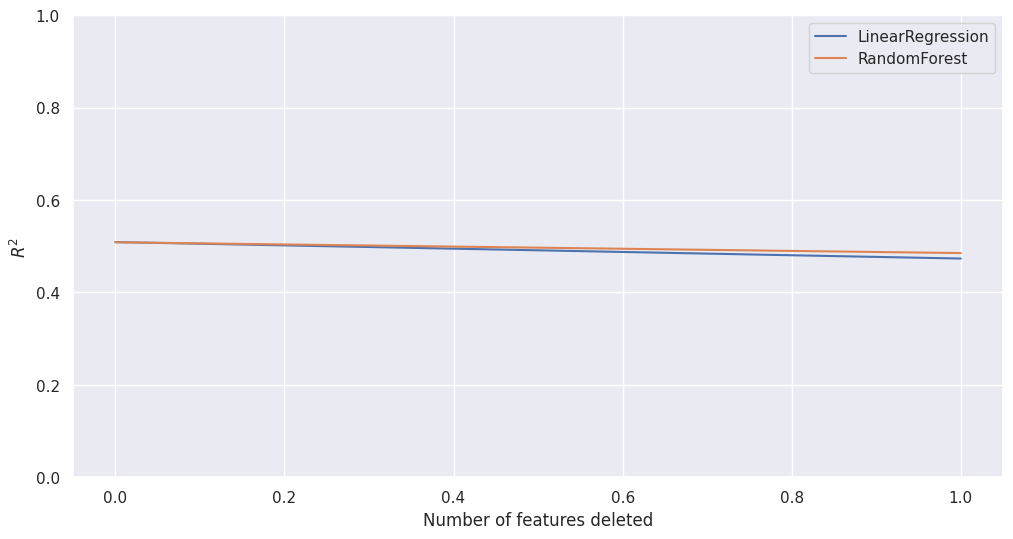

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(n_features_deleted, scores_lr, label='LinearRegression')
plt.plot(n_features_deleted, scores_rf, label='RandomForest')
plt.legend(loc='best')
plt.xlabel('Number of features deleted')
plt.ylabel('$R^2$')
plt.ylim(0, 1)
plt.show()